# 라이브러리 불러오기

In [9]:
import argparse 
import os
import torch
import torchaudio
import numpy as np
from pytorch_grad_cam import (
    GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus,
    AblationCAM, XGradCAM, EigenCAM, EigenGradCAM,
    LayerCAM, FullGrad, GradCAMElementWise
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputSoftmaxTarget
from wav2vec2_vib import Model
from torchinfo import summary
import librosa

# 모델 불러오기

In [2]:
# device = "cpu"
# device = "cuda" if torch.cuda.is_available
# () else "cpu"
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
model = Model(
    device=device,
    ssl_cpkt_path='xlsr2_300m.pt', # https://github.com/facebookresearch/fairseq/blob/main/examples/wav2vec/xlsr/README.md#:~:text=XLS%2DR%20300M-,download,-XLS%2DR%201B
).to(device)
# 가중치 로드 시 에러 핸들링 추가
try:
    model.load_state_dict(torch.load('vib_conf-5_gelu_2s_may27_epoch6.pth', map_location=device))
    print("Model weights loaded successfully!")
except FileNotFoundError:
    print("Model weights file not found. Please check the file path.")
except Exception as e:
    print(f"Error loading model weights: {e}")

/home/woonj/anaconda3/envs/grad_cam/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Model weights loaded successfully!


In [11]:
# 오디오 로드
# audio_path = "/home/woonj/grad-cam/1조인성_수상소감.wav"
# audio_path = "/home/woonj/grad-cam/CON_E_0033629.wav"
# audio_path = "/home/woonj/LIME_audio/audio_sample/송혜교_수상소감.mp3"
# audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/2-DSD-corpus/Real/Korean_AIHUB/01FHSH0028/01FHSH0028_00004.wav"
# audio_path = "/home/woonj/grad-cam/Artificial Intelligence News Anchor AI Kaur On The Future Of AI  More  CNBC TV18 (real + ai).mp3"
audio_path = "/home/woonj/analyze_missclassification/cnsl_real_fake_audio/2-DSD-corpus/Synthesizers/inthewild_spoof/416.wav"
# 필요한 경우 샘플링 레이트 설정 (None으로 기본 샘플링 레이트 사용)
waveform, sr = librosa.load(audio_path, sr=16000)  # librosa를 사용한다면 이렇게 가능
# waveform = torch.randn(64000)
waveform =  torch.Tensor(waveform)
waveform = waveform.unsqueeze(0)
waveform.shape

torch.Size([1, 33312])

In [5]:
model

Model(
  (ssl_model): SSLModel(
    (model): Wav2Vec2Model(
      (feature_extractor): ConvFeatureExtractionModel(
        (conv_layers): ModuleList(
          (0): Sequential(
            (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
            (1): Dropout(p=0.0, inplace=False)
            (2): Sequential(
              (0): TransposeLast()
              (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
              (2): TransposeLast()
            )
            (3): GELU(approximate='none')
          )
          (1-4): 4 x Sequential(
            (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
            (1): Dropout(p=0.0, inplace=False)
            (2): Sequential(
              (0): TransposeLast()
              (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
              (2): TransposeLast()
            )
            (3): GELU(approximate='none')
          )
          (5-6): 2 x Sequential(
            (0): Conv1d(512, 512, kernel_size=

# Grad-CAM 적용하기

In [4]:
# activation_layer = [model.ssl_model.model.feature_extractor.conv_layers[-1][0]]
# gradient_layers = model.backend.m_utt_level
# target_layer = [model.ssl_model.model.feature_extractor.conv_layers[-1][0]]
# target_layer = model.ssl_model.model.encoder.layers[23].self_attn.out_proj
# target_layer = model.backend.m_frame_level[6]
target_layer = model.LL

In [34]:
# target_layer = model.ssl_model.model.final_proj # 트랜스포머 바로 다음 리니어 레이어
# target_layer = model.LL

call function
forward
torch.Size([1, 33312])
activations_and_gradients - call
torch.Size([1, 33312])
Input tensor shape: torch.Size([1, 1, 33312])
Input tensor shape: torch.Size([1, 512, 6661])
Input tensor shape: torch.Size([1, 512, 3330])
Input tensor shape: torch.Size([1, 512, 1664])
Input tensor shape: torch.Size([1, 512, 831])
Input tensor shape: torch.Size([1, 512, 415])
Input tensor shape: torch.Size([1, 512, 207])
Input tensor shape: torch.Size([1, 1024, 103])
target
compute_cam_per_layer
input_tensor_basecam :  torch.Size([1, 33312])
get_cam_weights
grads.shape (1, 103, 128)
grads [[[-5.3336998e-06 -5.3010076e-06  6.7370770e-06 ... -5.8109081e-06
    8.0018417e-06 -5.2388982e-06]
  [-4.5009488e-06 -4.4683720e-06  5.6970412e-06 ... -4.8561569e-06
    6.7723886e-06 -4.4473832e-06]
  [-5.6771605e-06 -5.6144586e-06  7.1434702e-06 ... -6.0568277e-06
    8.5279917e-06 -5.5329901e-06]
  ...
  [-4.0873706e-06 -4.1206326e-06  5.1876982e-06 ... -4.4223434e-06
    6.1779192e-06 -4.052578

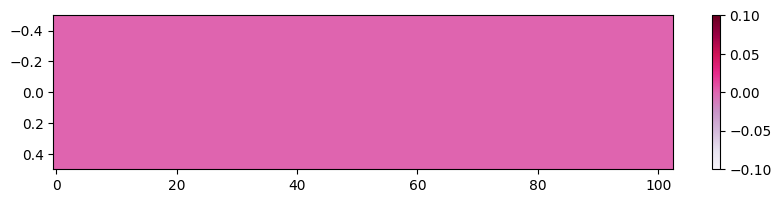

scale_cam_image
normalized_cam.shape :  (1, 103)
normalized_cam :  [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan]]


In [15]:
target_category = 1  # 원하는 클래스 인덱스
target = ClassifierOutputSoftmaxTarget(target_category)
cam = GradCAM(model=model, target_layers=[target_layer])
grayscale_cam = cam(input_tensor=waveform, targets=[target])

In [7]:
grayscale_cam.shape

(1, 1185)

In [8]:
grayscale_cam

array([[nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

# 시각화

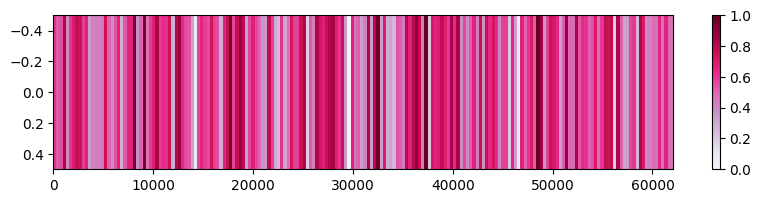

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `normalized_tensor` is the tensor you've normalized and is now in the range [0, 1]
# Scale the tensor to have a maximum of 320
# scaled_tensor_np = grayscale_cam.detach().numpy()
# Set the number of pixels for each value
pixel_per_value = 320

# Create a new array with expanded width
expanded_heatmap = np.repeat(grayscale_cam, pixel_per_value, axis=1)

# Create the heatmap
plt.figure(figsize=(10, 2))  # Set the size of the heatmap
plt.imshow(expanded_heatmap, cmap='PuRd', interpolation='nearest', aspect='auto')  # Generate the heatmap
plt.colorbar()  # Add color bar
plt.show()

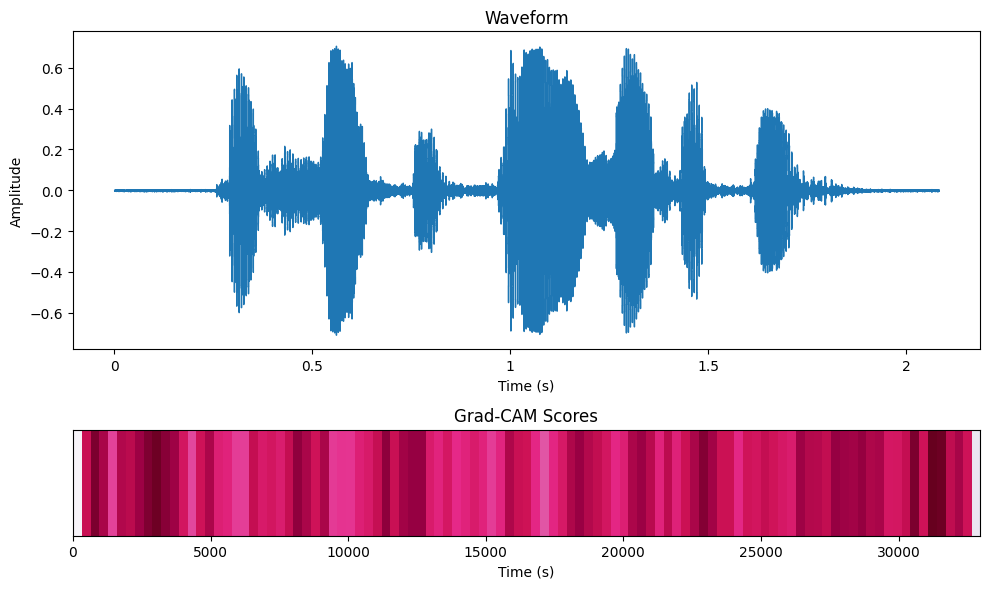

In [16]:
from IPython.display import Audio  # 오디오 재생을 위한 모듈
import matplotlib.pyplot as plt
import librosa.display

# 예제 waveform 데이터를 생성 (실제로는 여러분의 오디오 데이터를 사용)
waveform, sr = librosa.load(audio_path, sr=None)

# 각 Grad-CAM 값을 몇 픽셀로 표현할지 결정 (가로 길이 확장)
pixel_per_value = 320  # 각 값이 320개의 픽셀로 표현됨
expanded_heatmap = np.repeat(grayscale_cam, pixel_per_value, axis=1)

# Figure 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]})

# 1. 웨이브폼을 그립니다.
librosa.display.waveshow(waveform, sr=sr, ax=ax1)
ax1.set_title('Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# 2. Grad-CAM 히트맵을 웨이브폼 아래에 그립니다.
ax2.imshow(expanded_heatmap, cmap='PuRd', interpolation='nearest', aspect='auto')
ax2.set_title('Grad-CAM Scores')
ax2.set_xlabel('Time (s)')
ax2.set_yticks([])  # y축은 필요 없으므로 제거

# 그래프 간의 간격 조정
plt.tight_layout()
plt.show()
# 오디오 재생 기능 추가 (HTML5 재생바로 오디오 재생)
audio_widget = Audio(waveform, rate=sr)
display(audio_widget)

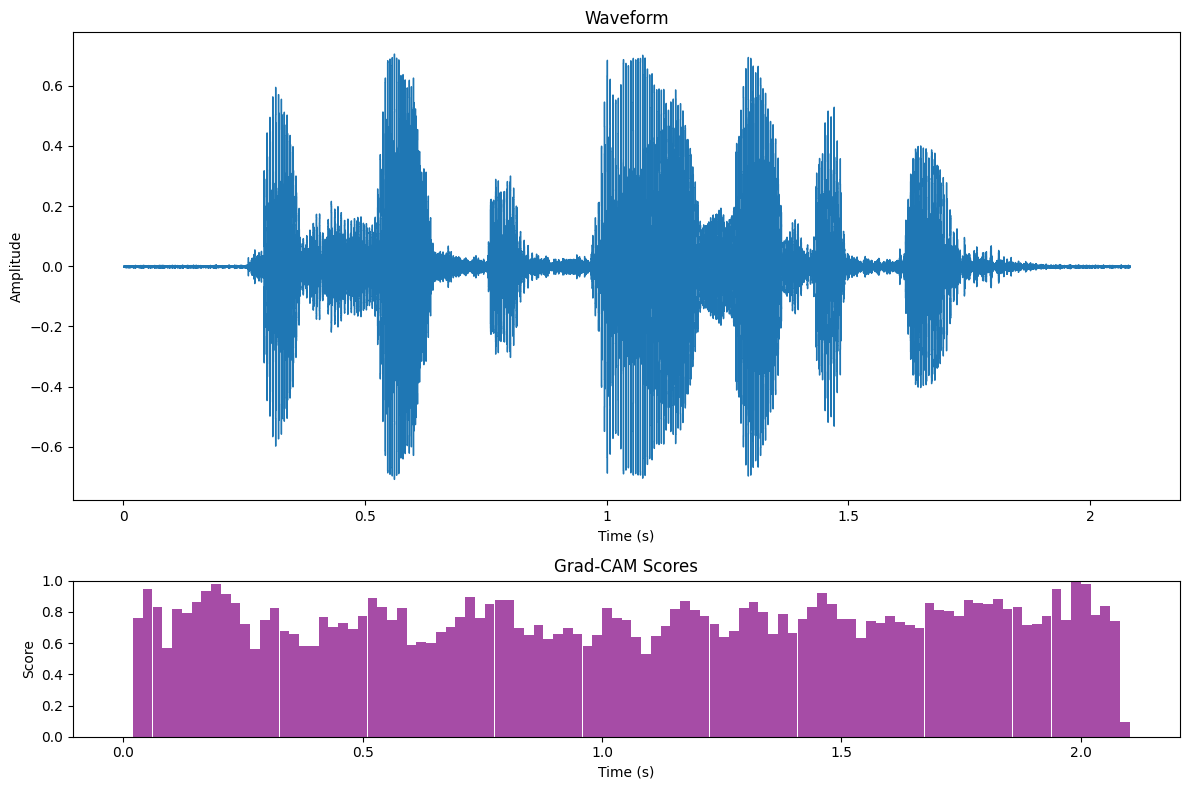

In [8]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# Load the audio file
waveform, sr = librosa.load(audio_path, sr=None)

# Get Grad-CAM values
grad_cam_values = grayscale_cam.squeeze()  # Remove any extra dimensions

# Calculate frame times
num_frames = len(grad_cam_values)
duration = len(waveform) / sr
frame_times = np.linspace(0, duration, num_frames)

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot the waveform
librosa.display.waveshow(waveform, sr=sr, ax=ax1)
ax1.set_title('Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Plot Grad-CAM scores as a bar chart
ax2.bar(frame_times, grad_cam_values, width=duration/num_frames, align='edge', color='purple', alpha=0.7)
ax2.set_title('Grad-CAM Scores')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1)  # Assuming Grad-CAM scores are normalized between 0 and 1

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display audio player
audio_widget = Audio(waveform, rate=sr)
display(audio_widget)